# EDA of Categorical Data

## Exploring categorical data
- creating graphical and numerical summaries of two categorical variables using the comics dataset

### Explore data

In [35]:
# IMport relevant libraries
library(ggplot2)
library(dplyr)

options(scipen=999)

In [2]:
# define the filename
filename <- "comics.csv"

# load the CSV file from the local directory
comics <- read.csv(filename)

# preview the first 5 rows
head(comics)

name,id,align,eye,hair,gender,gsm,alive,appearances,first_appear,publisher
Spider-Man (Peter Parker),Secret,Good,Hazel Eyes,Brown Hair,Male,NA,Living Characters,4043,Aug-62,marvel
Captain America (Steven Rogers),Public,Good,Blue Eyes,White Hair,Male,NA,Living Characters,3360,Mar-41,marvel
"Wolverine (James \""Logan\"" Howlett)",Public,Neutral,Blue Eyes,Black Hair,Male,NA,Living Characters,3061,Oct-74,marvel
"Iron Man (Anthony \""Tony\"" Stark)",Public,Good,Blue Eyes,Black Hair,Male,NA,Living Characters,2961,Mar-63,marvel
Thor (Thor Odinson),No Dual,Good,Blue Eyes,Blond Hair,Male,NA,Living Characters,2258,Nov-50,marvel
Benjamin Grimm (Earth-616),Public,Good,Blue Eyes,No Hair,Male,NA,Living Characters,2255,Nov-61,marvel


In [3]:
# Data on all commics created by DC and Marvel
comics

name,id,align,eye,hair,gender,gsm,alive,appearances,first_appear,publisher
Spider-Man (Peter Parker),Secret,Good,Hazel Eyes,Brown Hair,Male,NA,Living Characters,4043,Aug-62,marvel
Captain America (Steven Rogers),Public,Good,Blue Eyes,White Hair,Male,NA,Living Characters,3360,Mar-41,marvel
"Wolverine (James \""Logan\"" Howlett)",Public,Neutral,Blue Eyes,Black Hair,Male,NA,Living Characters,3061,Oct-74,marvel
"Iron Man (Anthony \""Tony\"" Stark)",Public,Good,Blue Eyes,Black Hair,Male,NA,Living Characters,2961,Mar-63,marvel
Thor (Thor Odinson),No Dual,Good,Blue Eyes,Blond Hair,Male,NA,Living Characters,2258,Nov-50,marvel
Benjamin Grimm (Earth-616),Public,Good,Blue Eyes,No Hair,Male,NA,Living Characters,2255,Nov-61,marvel
Reed Richards (Earth-616),Public,Good,Brown Eyes,Brown Hair,Male,NA,Living Characters,2072,Nov-61,marvel
Hulk (Robert Bruce Banner),Public,Good,Brown Eyes,Brown Hair,Male,NA,Living Characters,2017,May-62,marvel
Scott Summers (Earth-616),Public,Neutral,Brown Eyes,Brown Hair,Male,NA,Living Characters,1955,Sep-63,marvel
Jonathan Storm (Earth-616),Public,Good,Blue Eyes,Blond Hair,Male,NA,Living Characters,1934,Nov-61,marvel


**Working with factors**

In [4]:
# Getting the levels of a specific variable
levels(comics$align)

[1] "Bad"                "Good"               "Neutral"           
[4] "Reformed Criminals"

In [5]:
# Getting the levels of a specific variable
levels(comics$id)

[1] "No Dual" "Public"  "Secret"  "Unknown"

In [26]:
# Create a 2-way contingency table
table(comics$id, comics$align)

         
           Bad Good Neutral Reformed Criminals
  No Dual  474  647     390                  0
  Public  2172 2930     965                  1
  Secret  4493 2475     959                  1
  Unknown    7    0       2                  0

In [27]:
# Save the contigency as a table
tab_cnt <- table(comics$id, comics$align)
tab_cnt

         
           Bad Good Neutral Reformed Criminals
  No Dual  474  647     390                  0
  Public  2172 2930     965                  1
  Secret  4493 2475     959                  1
  Unknown    7    0       2                  0

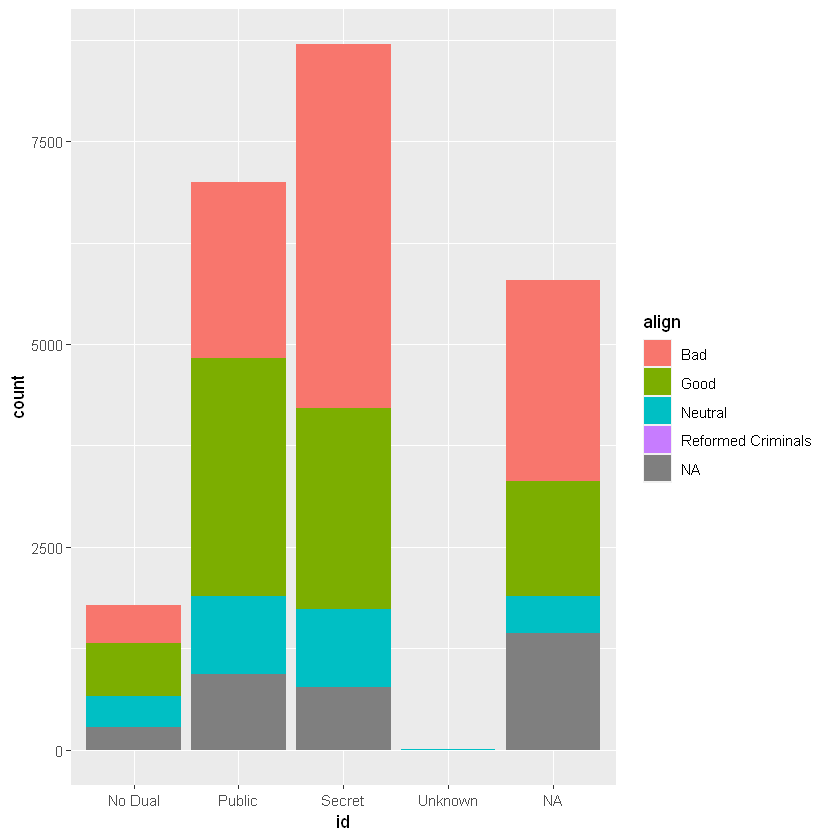

In [28]:
# Translate the table into graphs
ggplot(comics, aes(x = id, fill = align)) +
geom_bar()

**Dropping levels**

In [29]:
# Remove align level
# Use filter() to filter out all rows of comics with that level
# then drop the unused level with droplevels()
# Save the simplified dataset as comics_filtered
comics_filtered <- comics %>%
  filter(align != "Reformed Criminals") %>%
  droplevels()

# See the result
head(comics_filtered)

# Create a 2-way contingency table
table(comics_filtered$id, comics_filtered$align)

name,id,align,eye,hair,gender,gsm,alive,appearances,first_appear,publisher
Spider-Man (Peter Parker),Secret,Good,Hazel Eyes,Brown Hair,Male,NA,Living Characters,4043,Aug-62,marvel
Captain America (Steven Rogers),Public,Good,Blue Eyes,White Hair,Male,NA,Living Characters,3360,Mar-41,marvel
"Wolverine (James \""Logan\"" Howlett)",Public,Neutral,Blue Eyes,Black Hair,Male,NA,Living Characters,3061,Oct-74,marvel
"Iron Man (Anthony \""Tony\"" Stark)",Public,Good,Blue Eyes,Black Hair,Male,NA,Living Characters,2961,Mar-63,marvel
Thor (Thor Odinson),No Dual,Good,Blue Eyes,Blond Hair,Male,NA,Living Characters,2258,Nov-50,marvel
Benjamin Grimm (Earth-616),Public,Good,Blue Eyes,No Hair,Male,NA,Living Characters,2255,Nov-61,marvel


         
           Bad Good Neutral
  No Dual  474  647     390
  Public  2172 2930     965
  Secret  4493 2475     959
  Unknown    7    0       2

**Side-by-side barcharts**

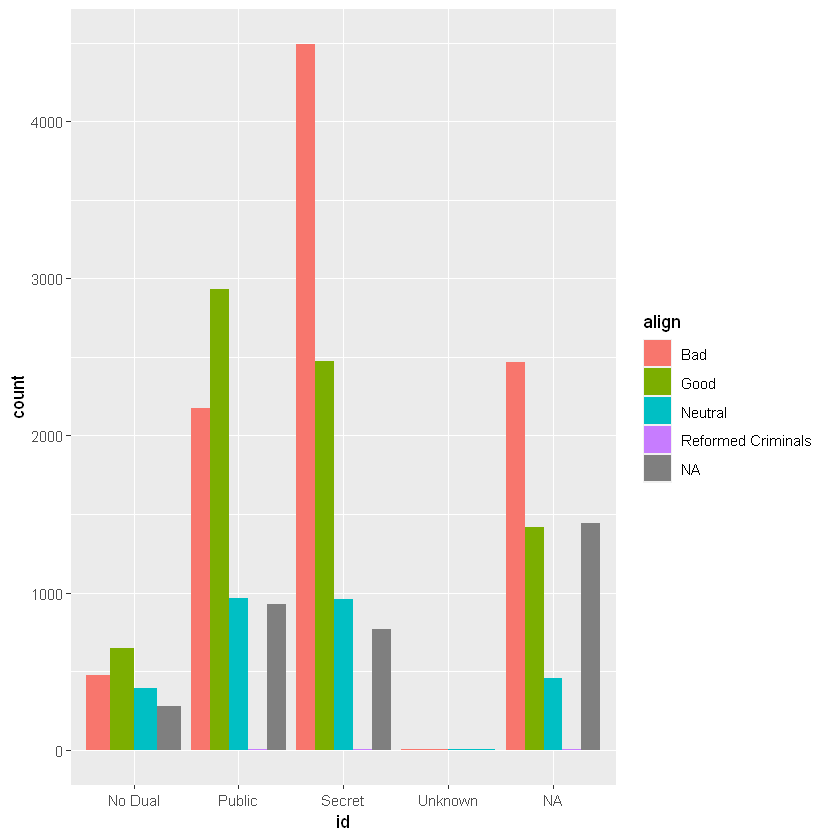

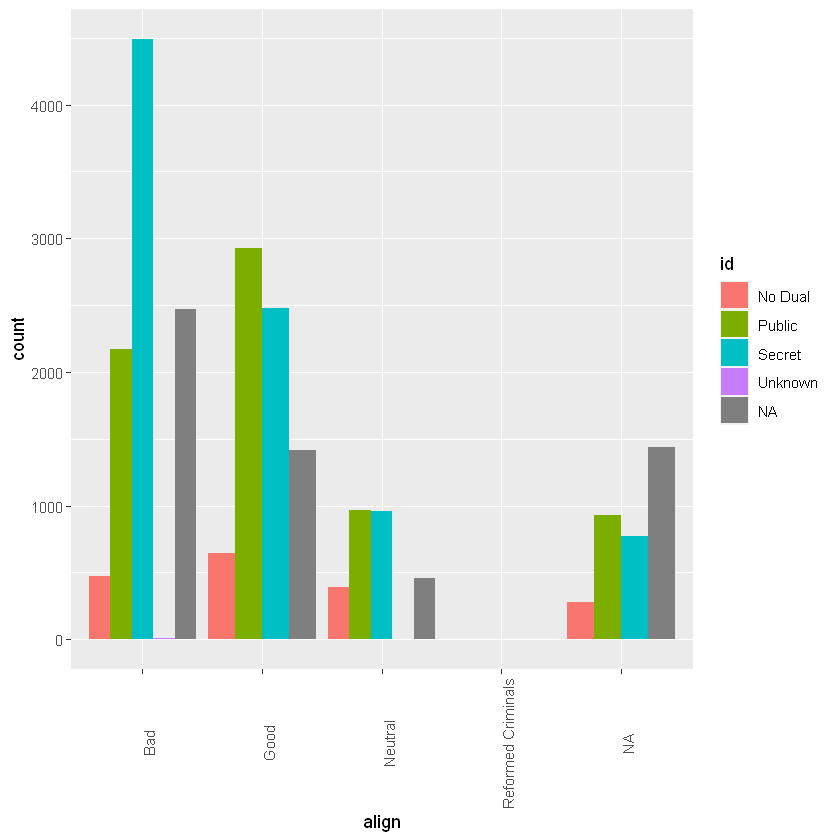

In [30]:
# Create side-by-side barchart of gender by alignment
ggplot(comics, aes(x = id, fill = align)) + 
  geom_bar(position = "dodge")

# Create side-by-side barchart of alignment by gender
ggplot(comics, aes(x = align, fill = id)) + 
  geom_bar(position = "dodge") +
  theme(axis.text.x = element_text(angle = 90))

### Counts vs Proportion

**From counts to proportions**

In [19]:
# Counts of the data
options(scipen = 999, digits = 3) # Simplify display format
tab_cnt <- table(comics$id, comics$align)
tab_cnt

         
           Bad Good Neutral Reformed Criminals
  No Dual  474  647     390                  0
  Public  2172 2930     965                  1
  Secret  4493 2475     959                  1
  Unknown    7    0       2                  0

In [20]:
# Proportions of data based on grand total
prop.table(tab_cnt)

         
                Bad      Good   Neutral Reformed Criminals
  No Dual 0.0305491 0.0416989 0.0251353          0.0000000
  Public  0.1399845 0.1888373 0.0621939          0.0000644
  Secret  0.2895721 0.1595128 0.0618072          0.0000644
  Unknown 0.0004511 0.0000000 0.0001289          0.0000000

In [21]:
# Sum of all these proportions
sum(prop.table(tab_cnt))

[1] 1

**Conditional proportions**

In [22]:
# Proportions of data based on row total 
# Condition on Identity
prop.table(tab_cnt, 1)

         
               Bad     Good  Neutral Reformed Criminals
  No Dual 0.313700 0.428193 0.258107           0.000000
  Public  0.357943 0.482861 0.159031           0.000165
  Secret  0.566726 0.312185 0.120964           0.000126
  Unknown 0.777778 0.000000 0.222222           0.000000

In [23]:
# Proportions of data based on column total 
# Condition on alignment
prop.table(tab_cnt, 2)

         
               Bad     Good  Neutral Reformed Criminals
  No Dual 0.066331 0.106907 0.168394           0.000000
  Public  0.303946 0.484137 0.416667           0.500000
  Secret  0.628743 0.408956 0.414076           0.500000
  Unknown 0.000980 0.000000 0.000864           0.000000

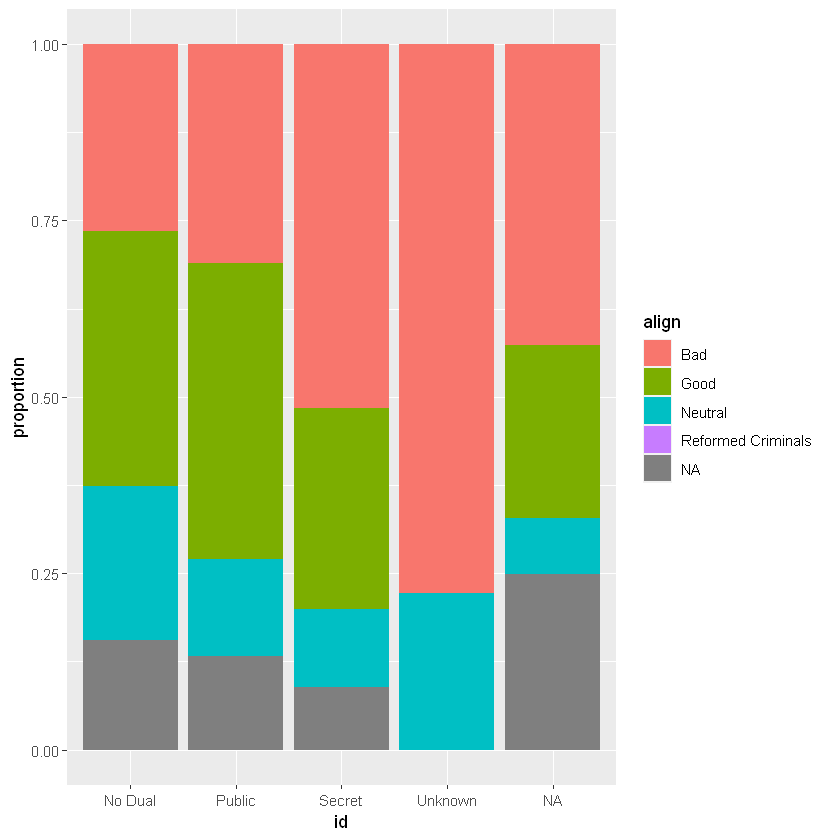

In [24]:
# Bar chart based on proportions
ggplot(comics, aes(x = id, fill = align)) +
geom_bar(position = "fill") +
ylab("proportion")

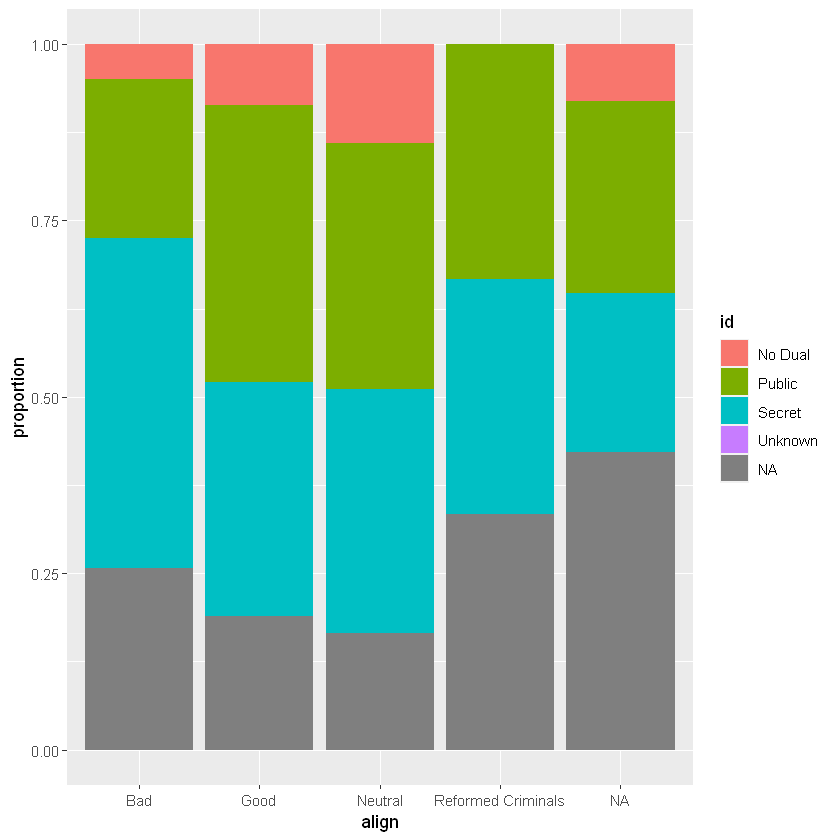

In [25]:
ggplot(comics, aes(x = align, fill = id)) +
geom_bar(position = "fill") +
ylab("proportion")

**A tables of joint and conditional proportions**

In [42]:
#  tables of joint and conditional proportions, respectively
tab <- table(comics$align, comics$id)

# Print fewer digits
options(scipen = 999, digits = 3) 

# Joint proportions
prop.table(tab)     

# Conditional on row
prop.table(tab, 1)  

# Conditional on columns
prop.table(tab, 2)  

                    
                       No Dual    Public    Secret   Unknown
  Bad                0.0305491 0.1399845 0.2895721 0.0004511
  Good               0.0416989 0.1888373 0.1595128 0.0000000
  Neutral            0.0251353 0.0621939 0.0618072 0.0001289
  Reformed Criminals 0.0000000 0.0000644 0.0000644 0.0000000

                    
                      No Dual   Public   Secret  Unknown
  Bad                0.066331 0.303946 0.628743 0.000980
  Good               0.106907 0.484137 0.408956 0.000000
  Neutral            0.168394 0.416667 0.414076 0.000864
  Reformed Criminals 0.000000 0.500000 0.500000 0.000000

                    
                      No Dual   Public   Secret  Unknown
  Bad                0.313700 0.357943 0.566726 0.777778
  Good               0.428193 0.482861 0.312185 0.000000
  Neutral            0.258107 0.159031 0.120964 0.222222
  Reformed Criminals 0.000000 0.000165 0.000126 0.000000

**Side-by Side Plot: Counts vs. proportions**

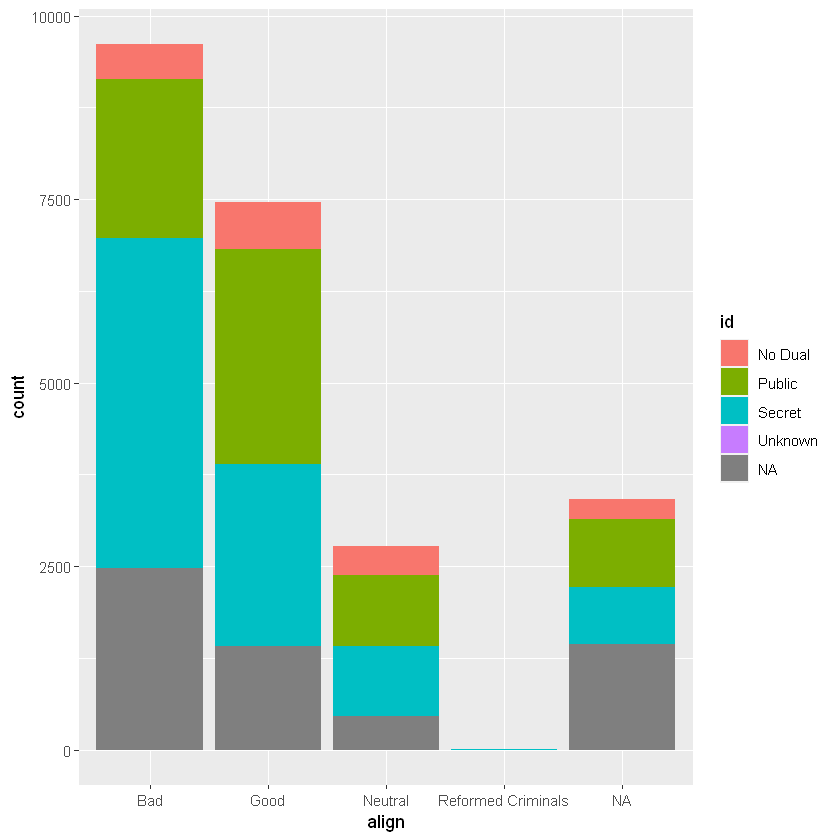

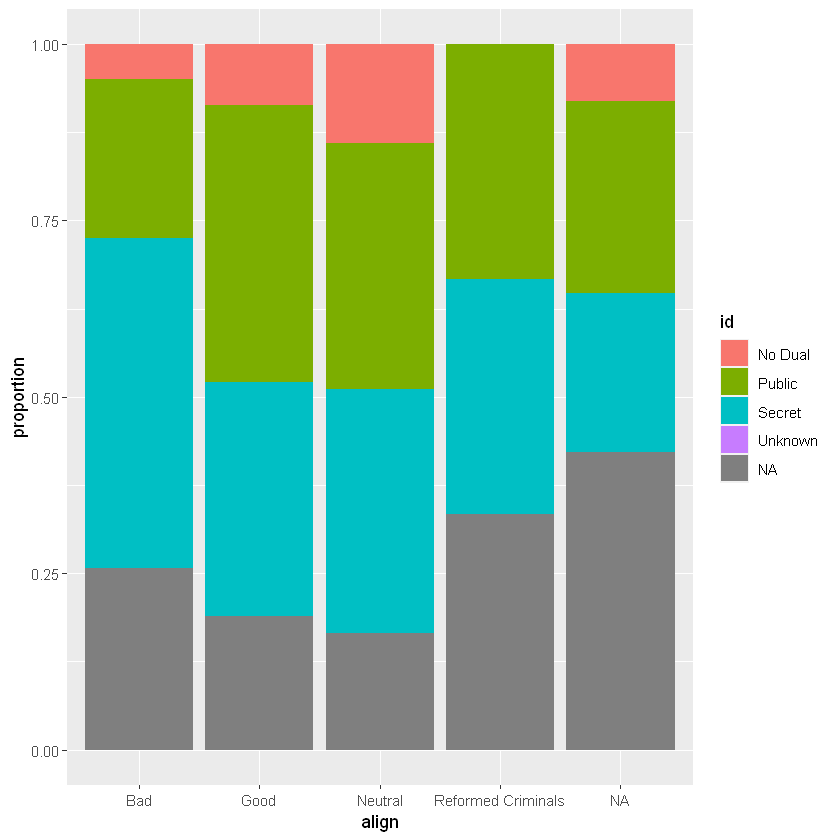

In [39]:
# Plot of id by align
ggplot(comics, aes(x = align, fill = id)) +
  geom_bar()
  
# Plot proportion of gender, conditional on align
ggplot(comics, aes(x = align, fill = id)) + 
  geom_bar(position = "fill") +
  ylab("proportion")

### Distribution of one variable

In [48]:
# Drop irrelevant levels
comics_filtered <- comics %>%
  filter(align != "Reformed Criminals") %>%
  filter(align != "NA") %>%
  droplevels()

# See the result
head(comics_filtered)

# Create a 2-way contingency table
table(comics_filtered$id, comics_filtered$align)

name,id,align,eye,hair,gender,gsm,alive,appearances,first_appear,publisher
Spider-Man (Peter Parker),Secret,Good,Hazel Eyes,Brown Hair,Male,NA,Living Characters,4043,Aug-62,marvel
Captain America (Steven Rogers),Public,Good,Blue Eyes,White Hair,Male,NA,Living Characters,3360,Mar-41,marvel
"Wolverine (James \""Logan\"" Howlett)",Public,Neutral,Blue Eyes,Black Hair,Male,NA,Living Characters,3061,Oct-74,marvel
"Iron Man (Anthony \""Tony\"" Stark)",Public,Good,Blue Eyes,Black Hair,Male,NA,Living Characters,2961,Mar-63,marvel
Thor (Thor Odinson),No Dual,Good,Blue Eyes,Blond Hair,Male,NA,Living Characters,2258,Nov-50,marvel
Benjamin Grimm (Earth-616),Public,Good,Blue Eyes,No Hair,Male,NA,Living Characters,2255,Nov-61,marvel


         
           Bad Good Neutral
  No Dual  474  647     390
  Public  2172 2930     965
  Secret  4493 2475     959
  Unknown    7    0       2

In [49]:
# Get the distribution of the variable id
table(comics_filtered$id)


No Dual  Public  Secret Unknown 
   1511    6067    7927       9 

In [50]:
# Store the contingency table as a proper table
tab_cnt <- table(comics_filtered$id, comics_filtered$align)
tab_cnt

         
           Bad Good Neutral
  No Dual  474  647     390
  Public  2172 2930     965
  Secret  4493 2475     959
  Unknown    7    0       2

**Graphs**

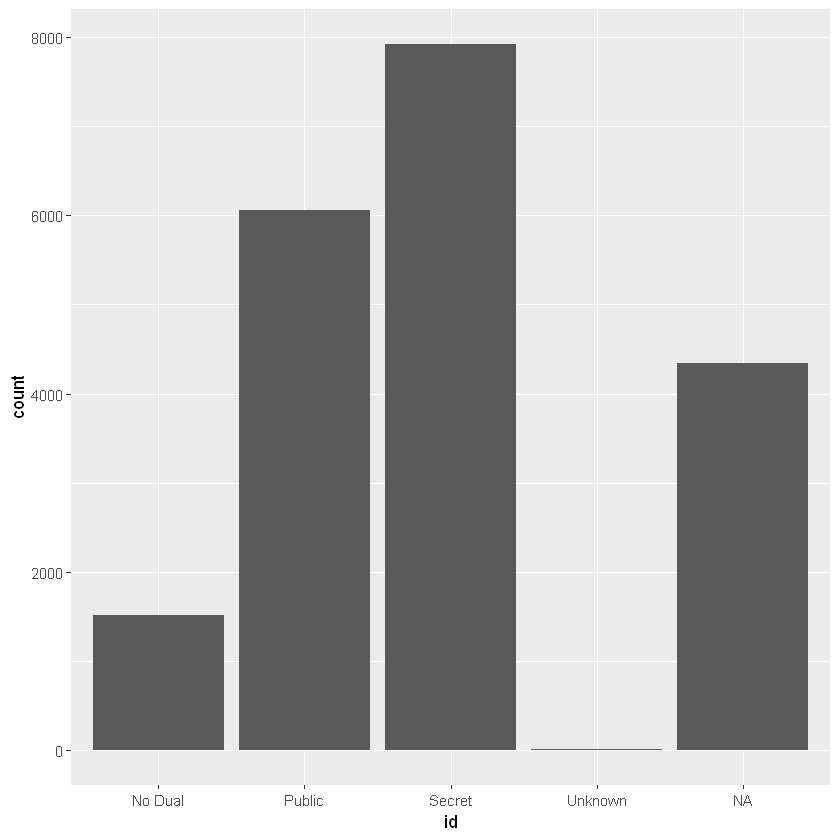

In [51]:
# Simple barchart
ggplot(comics_filtered, aes(x = id)) +
geom_bar()

**Facetting**
- Break down the data based on the levels of a category

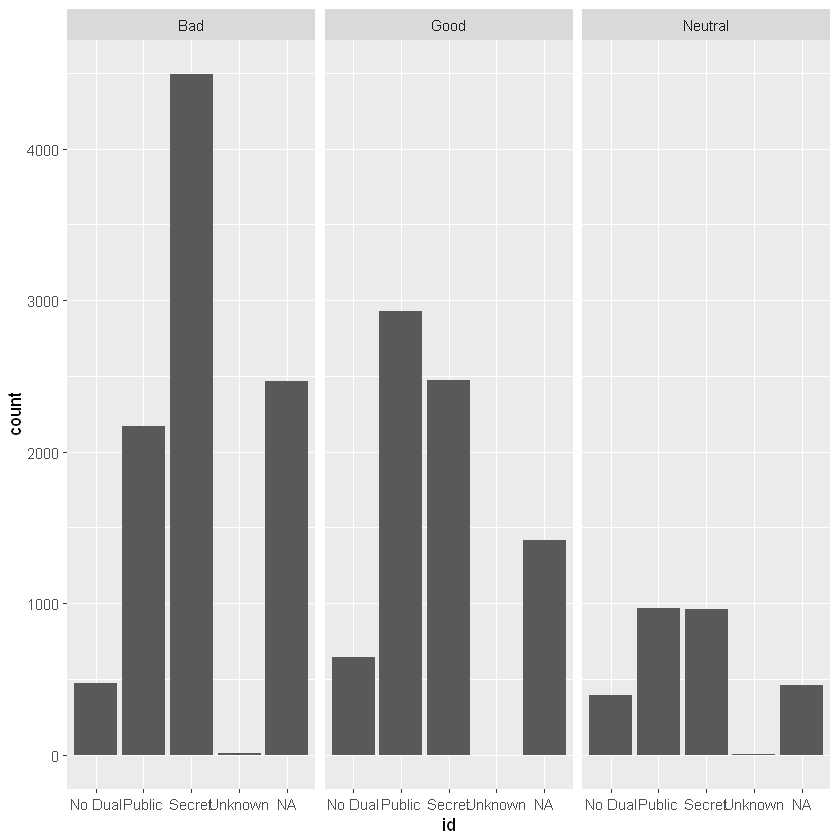

In [52]:
# Facetted barchart
ggplot(comics_filtered, aes(x = id)) +
geom_bar() +
facet_wrap(~align)

**Faceting vs. stacking**

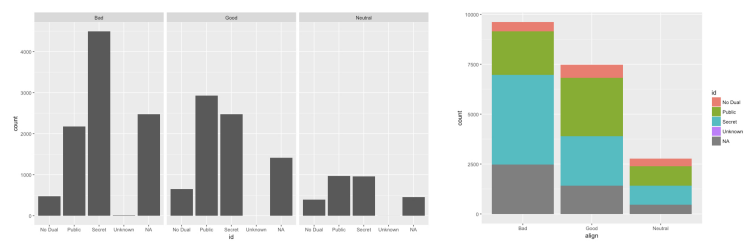

**Marginal barchart**

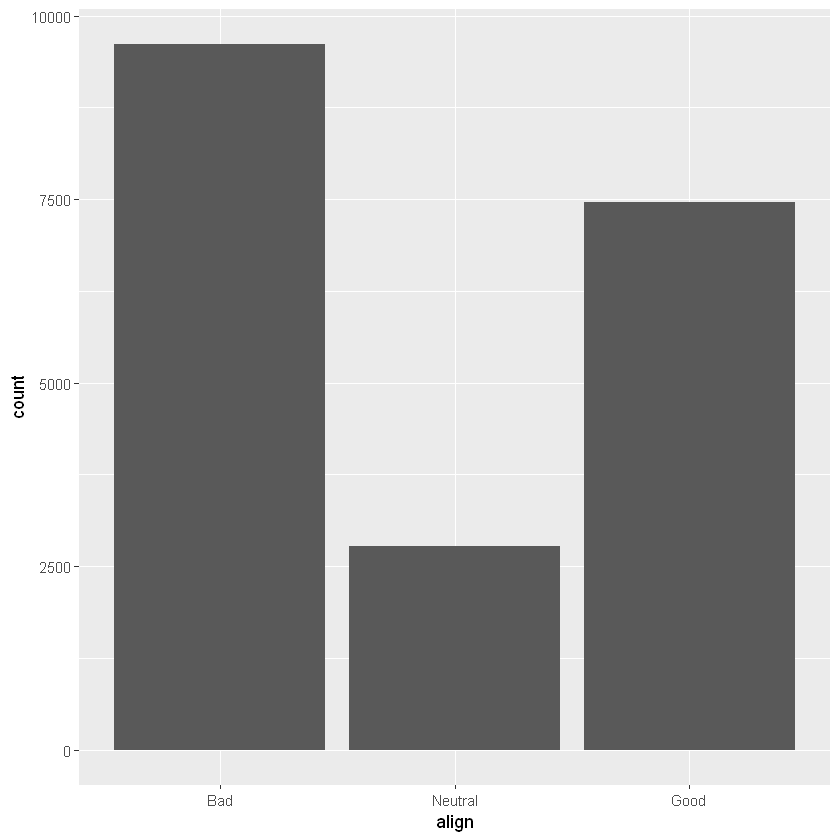

In [54]:
# Change the order of the levels in align
comics_filtered$align <- factor(comics_filtered$align, 
                       levels = c("Bad", "Neutral", "Good"))

# Create plot of align
ggplot(comics_filtered , aes(x = align)) + 
  geom_bar()

**Conditional barchart**

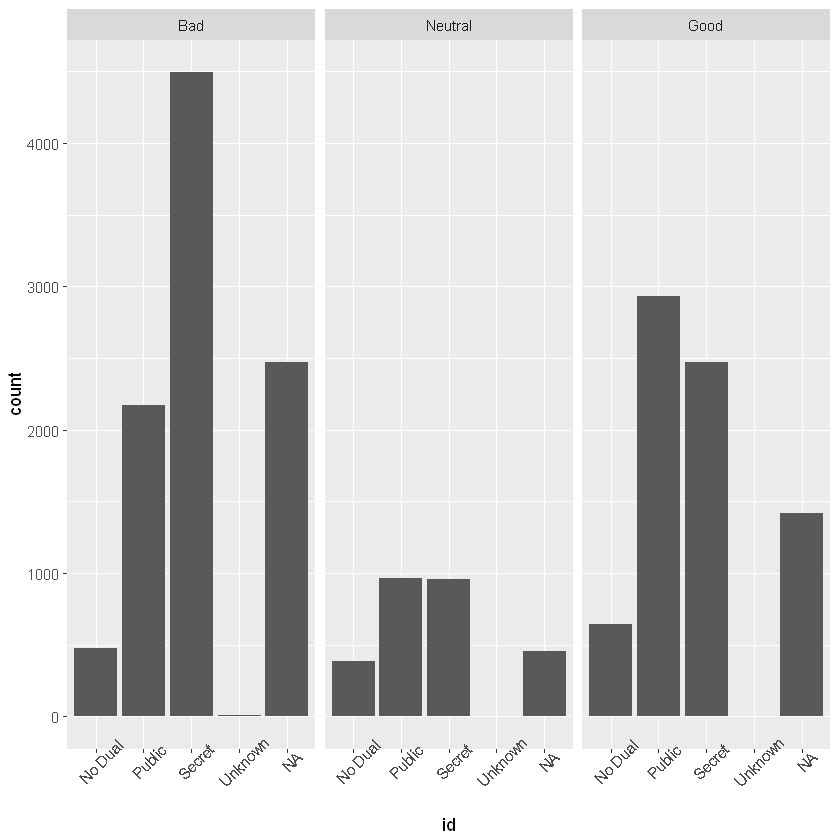

In [63]:
# Plot of alignment broken down by alignment
ggplot(comics_filtered, aes(x = id)) + 
  geom_bar() +
  facet_wrap(~ align) +
    theme(axis.text.x = element_text(angle = 45))